# TP03 : Régression logistique

## Régression linéaire polynomiale 
Dans cette partie, comme expliqué en cours nous voyons un exemple simple d'un modèle linéaire sous forme d'un polynome multiple. 



In [17]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np
import random

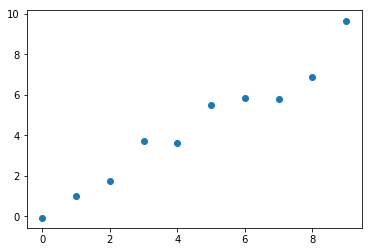

In [18]:
X = [i for i in range(10)]
Y = [random.gauss(x,0.75) for x in X]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

In [19]:
degree = 4 #degrès du polynome résultant. 

polynomial_features = PolynomialFeatures(degree = degree)
X_TRANSF = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_TRANSF, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.35604185014234646
R2:  0.9839021069306847


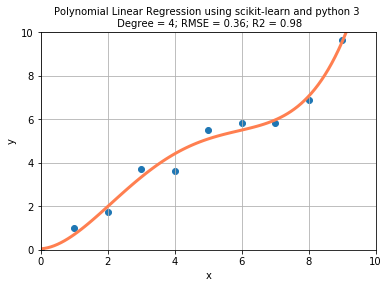

In [21]:
x_new_min = 0.0
x_new_max = 10.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(0,10)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y)
plt.show()

## Régression logistique 

La régression logistique est généralement utilisée à des fins de classification. Contrairement à la régression linéaire, la variable à prédire ne peut prendre qu'un nombre limité de valeurs (valeurs discrètes). 

Lorsque le nombre de résultats possibles est seulement deux, on parle de régression logistique binaire.

![](img/logistic.JPG) 

Dans la figure ci-dessus on comprend que la régression logistique est composée d'une régression linéaire suivie de l'application d'une certaine fonction. Cette fonction est la fonction sigmoid dont voici le graphe : 

![](img/sigmoid.JPG) 


## 1 - Préparation des données : 
Les données consistent en un ensemble de notes des etudiants et la valeur à prédire est si l'etudiant est admis(1) ou pas(0) 

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [301]:
header = ["Note1", "Note2", "Admis"]
notes = pd.read_csv('datasets/marks.txt', names=header)

In [302]:
X = notes.iloc[:, :-1].values
y = notes.iloc[:, -1].values

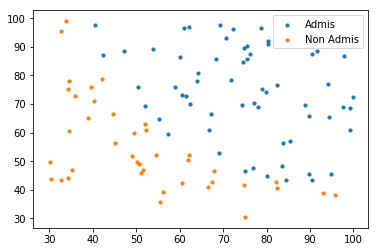

In [303]:
admis = notes.loc[y == 1]
non_admis = notes.loc[y == 0]

plt.scatter(admis.iloc[:, 0], admis.iloc[:, 1], s=10, label='Admis')
plt.scatter(non_admis.iloc[:, 0], non_admis.iloc[:, 1], s=10, label='Non Admis')
plt.legend()
plt.show()

## 2- Régression logistique 

**Expressions mathématiques :  **:
<img src="img/Math.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/cost.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/total.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/deriv.PNG" alt="Drawing" style="width: 300px;"/>

In [304]:
# TODO : Calculer le sigmoid de la valeur x 
import math
def sigmoid(x):
    return 1/(1+np.exp(-x)) 

# Test : 
sigmoid(0)

0.5

In [305]:
# TODO : La fonction de coût utilisée dans la régression logistique 
def J(x,y,theta):
    
    return (-1/x.shape[0])*np.sum(y*np.log(sigmoid(np.dot(x,theta))) + (1-y)*np.log(1-sigmoid(np.dot(x,theta))))
 

In [306]:
# TODO : Programmer la fonction d'entrainement du modèle 
def train(x,y,theta, alpha=1 ): 
    for i in range(500):
        j=J(x,y,theta)
        
        tmp_theta=theta-alpha*(1/x.shape[0])*np.dot(x.T,sigmoid(np.dot(x,theta))-y)
        
        tmp_j=J(x,y,tmp_theta)
        
        theta=tmp_theta
        if ( tmp_j-j == 0 ) :
            i=499
    return theta , j 

# TODO : fonction de normalisation des données X 
def normalisation(X):
    m=np.mean(X,axis=0)
    ro=np.std(X,axis=0)
    X_n = (X - m)/ro
    return X_n

X=normalisation(X)
X = np.append(np.ones((X.shape[0],1)),X,axis=1)
y=y.reshape(X.shape[0],1)
theta = np.zeros((X.shape[1],1))

theta, cout=train(X,y,theta )
# TODO : Entrainer le modèle en choisissant les bons hyperparamètres. 
print("theta : ",theta)
print("cout : ", cout)

theta :  [[1.6860838 ]
 [3.92373195]
 [3.65831667]]
cout :  0.20352828547330373


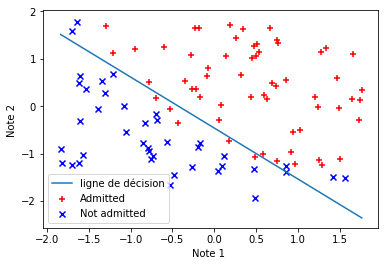

In [307]:
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_values = (- (theta[0] + np.dot(theta[1], x_value[0])) / theta[2],  - (theta[0] + np.dot(theta[1], x_value[1])) / theta[2])

pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

plt.plot(x_value, y_values, label='ligne de décision')
plt.xlabel('Note 1 ')
plt.ylabel('Note 2 ')
plt.legend()
plt.show()

In [308]:
# TODO : donner la fonction de prédiction qui retourne la probabilité que X est dans chaque classe 
def predict(x):
    return proba 
    

## 3- Implementation sous sklearn : 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# TODO : Diviser les données en données d'entrainement et données de tests (Fait dans le TP02 )
## Décider de la taille des données pour chaque set
X_train, X_test, y_train, y_test = 

# Créer le modèle 
model = LogisticRegression()

# Entraîner le modèle 
model.fit(X, y)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y.flatten(),predicted_classes)
